```python
import scipy.interpolate
import matplotlib 

# some parameters
N = 300             # number of points for interpolation
xy_center = [2,2]   # center of the plot
radius = 2          # radius

# mostly original code
meanR = [9.95184937,   9.87947708,   9.87628496,   9.78414422,
         9.79365258,   9.96168969,   9.87537519,   9.74536093,
        10.16686878,  10.04425475,  10.10444126,  10.2917172 ,
        10.16745917,  10.0235203 ,   9.89914   ,  10.11263505,
         9.99756449,  10.17861254,  10.04704248]

koord = [[1,4],[3,4],[1,3],[3,3],[2,3],[1,2],[3,2],[2,2],[1,1],[3,1],[2,1],[1,0],[3,0],[0,3],[4,3],[0,2],[4,2],[0,1],[4,1]]
# koord = [[1,3],
#          [3,3],
#          [1,1],
#          [1,3]]

x,y = [],[]
for i in koord:
    x.append(i[0])
    y.append(i[1])

z = meanR

xi = np.linspace(-2, 6, N)
yi = np.linspace(-2, 6, N)
zi = scipy.interpolate.griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')
# zi = np.meshgrid(x, y)

# set points > radius to not-a-number. They will not be plotted.
# the dr/2 makes the edges a bit smoother
dr = xi[1] - xi[0]
for i in range(N):
    for j in range(N):
        r = np.sqrt((xi[i] - xy_center[0])**2 + (yi[j] - xy_center[1])**2)
        if (r - dr/2) > radius:
            zi[j,i] = "nan"

# make figure
fig = plt.figure()

# set aspect = 1 to make it a circle
ax = fig.add_subplot(111, aspect = 1)

# use different number of levels for the fill and the lines
CS = ax.contourf(xi, yi, zi, 60, cmap = plt.cm.jet, zorder = 1)
ax.contour(xi, yi, zi, 15, colors = "grey", zorder = 2)

# make a color bar
cbar = fig.colorbar(CS, ax=ax)

# add the data points
# I guess there are no data points outside the head...
ax.scatter(x, y, marker = 'o', c = 'b', s = 15, zorder = 3)

# draw a circle
# change the linewidth to hide the 
circle = matplotlib.patches.Circle(xy = xy_center, radius = radius, edgecolor = "k", facecolor = "none")
ax.add_patch(circle)

# make the axis invisible 
for loc, spine in ax.spines.items():
    # use ax.spines.items() in Python 3
    spine.set_linewidth(0)

# remove the ticks
ax.set_xticks([])
ax.set_yticks([])

# Add some body parts. Hide unwanted parts by setting the zorder low
# add two ears
circle = matplotlib.patches.Ellipse(xy = [0,2], width = 0.5, height = 1.0, angle = 0, edgecolor = "k", facecolor = "w", zorder = 0)
ax.add_patch(circle)
circle = matplotlib.patches.Ellipse(xy = [4,2], width = 0.5, height = 1.0, angle = 0, edgecolor = "k", facecolor = "w", zorder = 0)
ax.add_patch(circle)
# add a nose
xy = [[1.5,3], [2,4.5],[2.5,3]]
polygon = matplotlib.patches.Polygon(xy = xy, facecolor = "w", zorder = 0)
ax.add_patch(polygon) 

# set axes limits
ax.set_xlim(-0.5, 4.5)
ax.set_ylim(-0.5, 4.5)

plt.show() 
```

In [2]:
using Plots
pyplot()

Plots.PyPlotBackend()


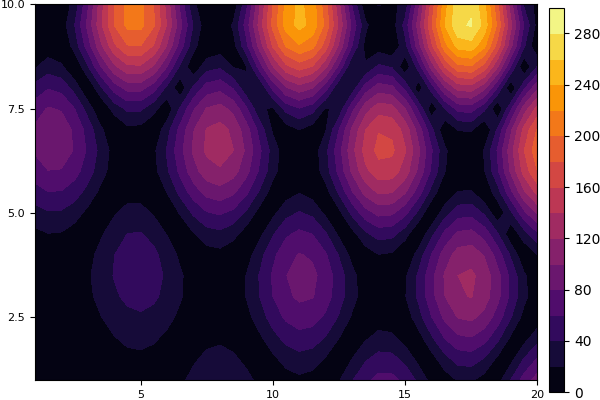

In [4]:
x = 1:0.5:20
y = 1:0.5:10
f(x,y) = begin 
        (3x + y ^ 2) * abs(sin(x) + cos(y))
    end
X = repmat(x',length(y),1)
Y = repmat(y,1,length(x))
Z = map(f,X,Y)
p1 = contour(x,y,f,fill=true)
plot(p1)
